In [12]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

datasets:<br>
https://universe.roboflow.com/college-vlzv7/student-monitoring-system/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true<br>
https://www.sciencedirect.com/science/article/pii/S2352340923008387<br>

In [3]:
data = pd.read_csv("data/attention_detection_dataset_v1.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_of_face  4000 non-null   int64  
 1   face_x      4000 non-null   float64
 2   face_y      4000 non-null   float64
 3   face_w      4000 non-null   float64
 4   face_h      4000 non-null   float64
 5   face_con    4000 non-null   float64
 6   no_of_hand  4000 non-null   int64  
 7   pose        4000 non-null   object 
 8   pose_x      4000 non-null   float64
 9   pose_y      4000 non-null   float64
 10  phone       4000 non-null   int64  
 11  phone_x     4000 non-null   int64  
 12  phone_y     4000 non-null   int64  
 13  phone_w     4000 non-null   int64  
 14  phone_h     4000 non-null   int64  
 15  phone_con   4000 non-null   float64
 16  label       4000 non-null   int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 531.4+ KB
None


,no_of_face,face_x,face_y,face_w,face_h,face_con,no_of_hand,pose,pose_x,pose_y,phone,phone_x,phone_y,phone_w,phone_h,phone_con,label
0,1,256.643658,144.163663,169.071331,169.066601,88.813317,0,down,-11.569698,-1.612015,0,0,0,0,0,0.00000,1
1,1,252.967014,137.871659,163.131542,163.126974,86.704057,0,down,-15.000000,10.000000,0,0,0,0,0,0.00000,1
2,1,254.416771,134.427950,155.147362,155.145836,88.408792,0,down,-12.705953,0.082978,0,0,0,0,0,0.00000,1
3,2,256.315517,246.199763,141.227055,141.227217,89.279491,2,right,32.585681,36.572800,1,117,137,276,421,0.86614,1
4,1,293.000126,285.859563,197.011509,196.998653,80.872309,2,forward,-4.013085,-9.905692,0,0,0,0,0,0.00000,1


In [4]:
data["pose"].value_counts()

pose
forward    2951
down        537
left        334
right       178
Name: count, dtype: int64

In [5]:
data.describe()

,no_of_face,face_x,face_y,face_w,face_h,face_con,no_of_hand,pose_x,pose_y,phone,phone_x,phone_y,phone_w,phone_h,phone_con,label
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.989250,254.650089,255.557294,159.423565,159.420030,86.801790,0.678250,-0.076302,2.154403,0.15150,27.357250,44.078750,47.441250,67.596000,0.119662,0.421500
std,0.156973,52.049840,59.459216,43.990525,43.986279,14.372761,0.840181,7.679380,8.841681,0.35858,75.370945,110.748284,118.642115,161.429693,0.285111,0.493861
min,0.000000,0.000000,-29.021616,0.000000,0.000000,0.000000,0.000000,-19.986642,-38.629232,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,240.010495,227.332100,137.482705,137.480628,85.418913,0.000000,-3.682301,-3.935287,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,259.251165,270.518521,153.349991,153.349843,90.510479,0.000000,1.110766,3.615890,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,279.900060,291.378399,184.414086,184.404820,94.245134,1.000000,4.572721,9.087400,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,436.379127,434.430494,486.327209,486.349926,98.248923,2.000000,32.585681,36.572800,1.00000,500.000000,447.000000,640.000000,480.000000,0.931619,1.000000


In [6]:
data = data.drop(data[(data["no_of_face"] != 1) | (data["phone"] != 0) | (data["no_of_hand"] != 0)].index)
data.describe()

,no_of_face,face_x,face_y,face_w,face_h,face_con,no_of_hand,pose_x,pose_y,phone,phone_x,phone_y,phone_w,phone_h,phone_con,label
count,1792.0,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.0,1792.000000,1792.000000,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.000000
mean,1.0,251.682679,258.650914,154.359050,154.357445,89.309961,0.0,0.498970,5.116659,0.0,0.0,0.0,0.0,0.0,0.0,0.305246
std,0.0,44.573316,53.597076,39.005295,39.002071,9.047127,0.0,7.976737,8.178444,0.0,0.0,0.0,0.0,0.0,0.0,0.460640
min,1.0,57.336001,-29.021616,88.258686,88.258381,50.382346,0.0,-19.986642,-38.629232,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,1.0,230.681853,227.472138,137.474365,137.472625,86.849672,0.0,-3.080820,2.273696,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,1.0,251.621618,267.121488,148.819389,148.819413,92.537418,0.0,1.152075,7.203109,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,1.0,275.226874,302.541518,160.376182,160.376072,95.299023,0.0,5.285256,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1.0,436.379127,390.325608,486.327209,486.349926,98.248923,0.0,29.496788,28.045940,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [7]:
pose_encoding = {"pose": {"forward": 0, "down": 1, "left": 2, "right": 3}}
data = data.replace(pose_encoding)
data.head()

,no_of_face,face_x,face_y,face_w,face_h,face_con,no_of_hand,pose,pose_x,pose_y,phone,phone_x,phone_y,phone_w,phone_h,phone_con,label
0,1,256.643658,144.163663,169.071331,169.066601,88.813317,0,1,-11.569698,-1.612015,0,0,0,0,0,0.0,1
1,1,252.967014,137.871659,163.131542,163.126974,86.704057,0,1,-15.000000,10.000000,0,0,0,0,0,0.0,1
2,1,254.416771,134.427950,155.147362,155.145836,88.408792,0,1,-12.705953,0.082978,0,0,0,0,0,0.0,1
5,1,430.241623,177.893419,126.719398,126.718884,68.329245,0,0,6.472189,4.480845,0,0,0,0,0,0.0,0
6,1,307.529125,210.028131,162.727566,162.726860,88.881159,0,2,3.737665,-14.432352,0,0,0,0,0,0.0,1


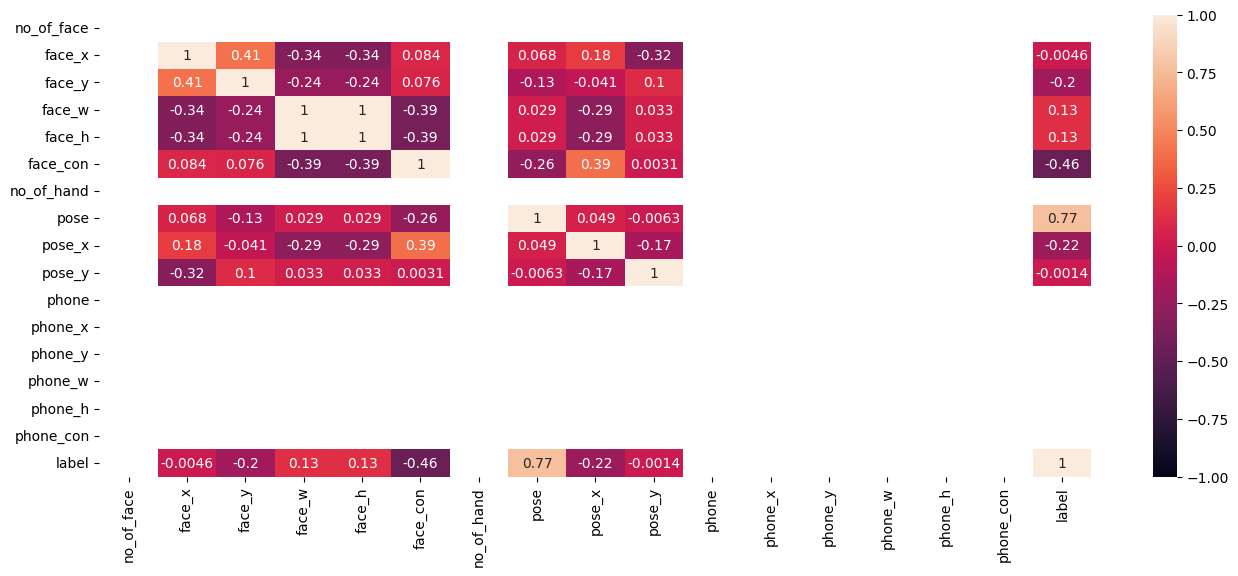

In [8]:
plt.figure(figsize=(16, 6))

sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True);

In [15]:
X = data.drop(["no_of_face", "face_x", "face_y", "face_w", "face_h", "face_con", 
               "no_of_hand", "phone", "phone_x", "phone_y", "phone_w", "phone_h", "phone_con", 
               "label"], axis=1)
y = data["label"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [20]:
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
param_grid = {
    'max_features': [2, 3, 4],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'max_features': 2, 'n_estimators': 200}

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       116

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



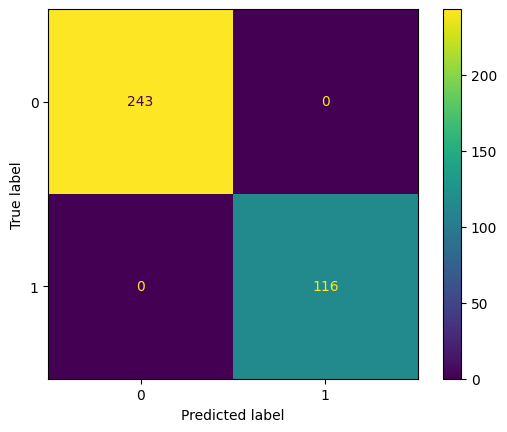

In [23]:
y_pred = best_model.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)
cf_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc_score}")
print(cf_report)

cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels=rf_model.classes_)
cm_plot.plot()
plt.show()